In [49]:
import pandas as pd

In [50]:
# Read the csv file from Kaggle, It's about Trump's tweets until July 2020.
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/realdonaldtrump.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# create a new column called "iddf" to store the index of each row
df["iddf"]=range(len(df))
df2= df[["iddf","content"]]

In [52]:
# remove rows with empty content
df2 = df2.dropna(subset=['content'])

In [53]:
# See length of df2
len(df2)

43352

In [54]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [55]:
# Cleaning the text. According to the guideline, the cleaning is not necessary.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

datatext = df2["content"].apply(preprocess)

In [56]:
!pip install top2vec
!pip install top2vec[sentence_transformers]
!pip install top2vec[sentence_encoders]

In [57]:
from top2vec import Top2Vec
#Training model
model = Top2Vec(datatext.values, embedding_model = "universal-sentence-encoder")

2023-11-13 10:58:43,629 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-11-13 10:58:51,426 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-11-13 10:59:07,370 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-13 10:59:38,601 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-13 11:01:20,366 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-13 11:01:26,827 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [58]:
# Get the number of topics(random)
model.get_num_topics()

297

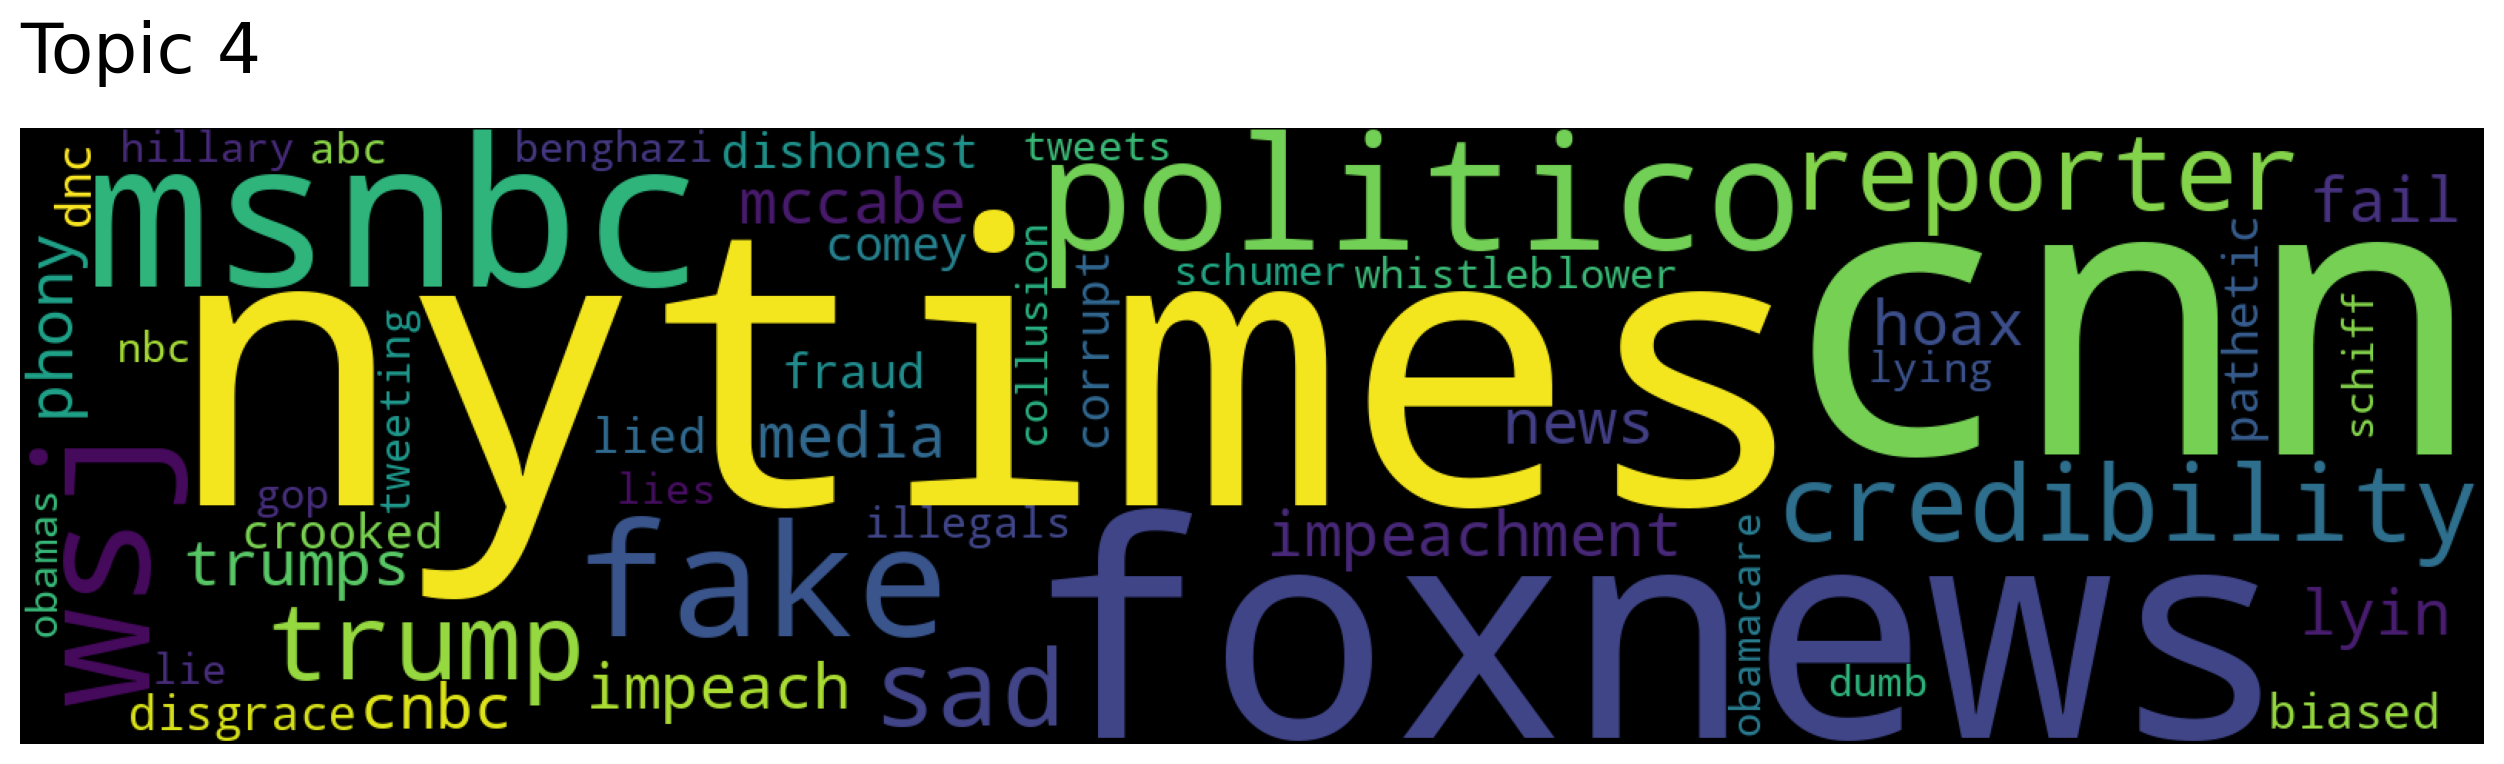

In [59]:
# Generate wordclound for 4.topic
model.generate_topic_wordcloud(4)

In [60]:
# Reducting the topics and create a new model2
model2 = model.hierarchical_topic_reduction(num_topics=10)

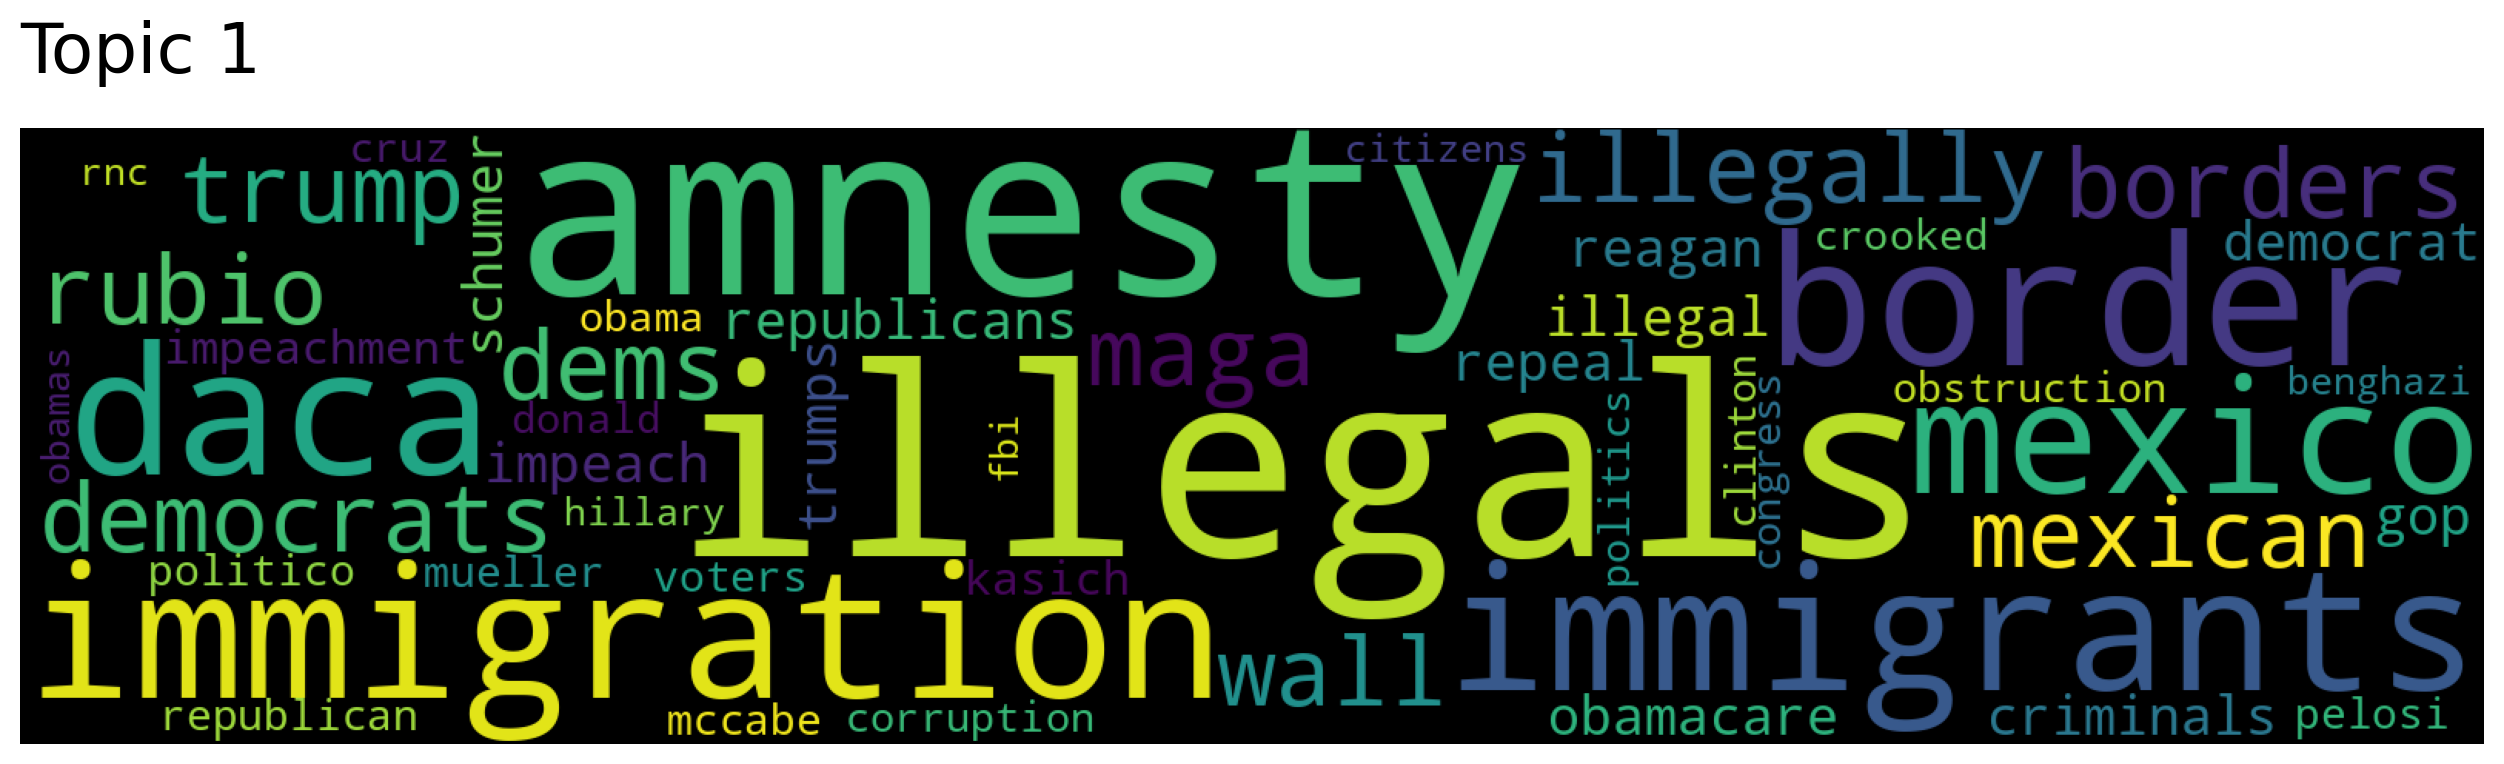

In [61]:
model2.generate_topic_wordcloud(4)

In [62]:
!pip install umap-learn[plot]

In [63]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


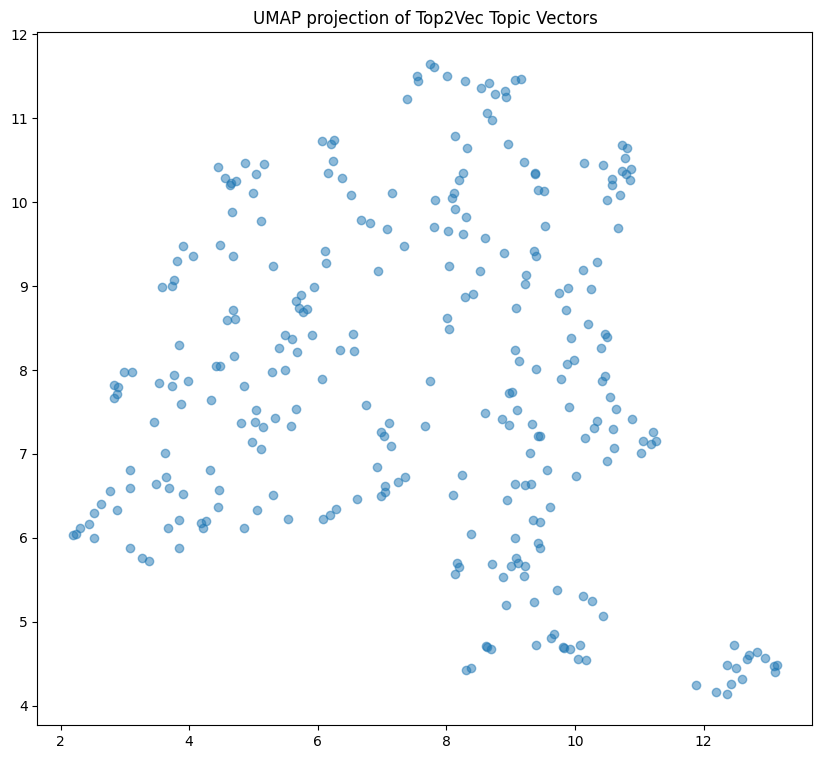

In [88]:
import umap
import numpy as np
# Get the topic vectors
topic_vectors = model.topic_vectors

# Dimensionalization
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.2, n_components=2, random_state=28)
umap_embeddings = umap_model.fit_transform(topic_vectors)


# Plotting the UMAP
plt.figure(figsize=(10, 9))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of Top2Vec Topic Vectors')
plt.show()

In [65]:
!pip install hdbscan

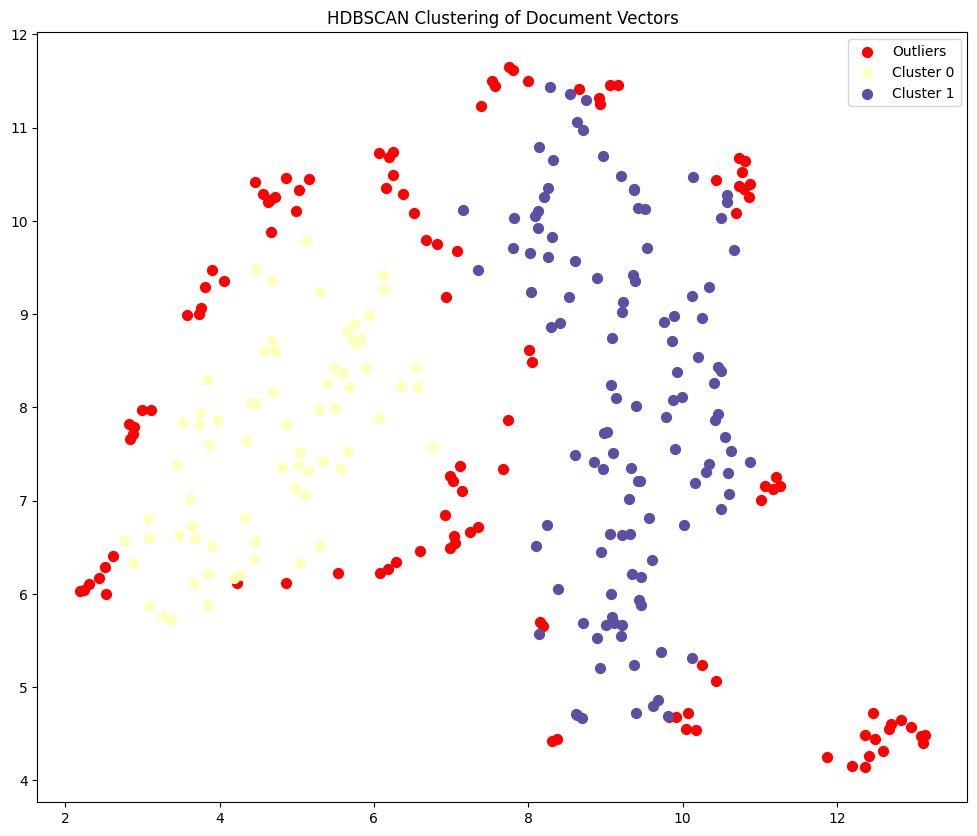

In [87]:
import hdbscan
# Apply HDBSCAN
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=28)
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(umap_embeddings)

# Plotting
plt.figure(figsize=(12, 10))
unique_clusters = np.unique(cluster_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:  # Outliers marked as -1
        color = 'red'

    member_mask = cluster_labels == cluster
    plt.scatter(umap_embeddings[member_mask, 0], umap_embeddings[member_mask, 1],
                s=50, color=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')

plt.title('HDBSCAN Clustering of Document Vectors')
plt.legend()
plt.show()

In [89]:
model3 = Top2Vec(df2['content'].values, embedding_model = "universal-sentence-encoder")

2023-11-13 11:21:28,877 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-11-13 11:21:32,158 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-11-13 11:21:42,889 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-11-13 11:21:58,663 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-11-13 11:22:50,399 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-11-13 11:22:57,529 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [90]:
model3.get_num_topics()

260

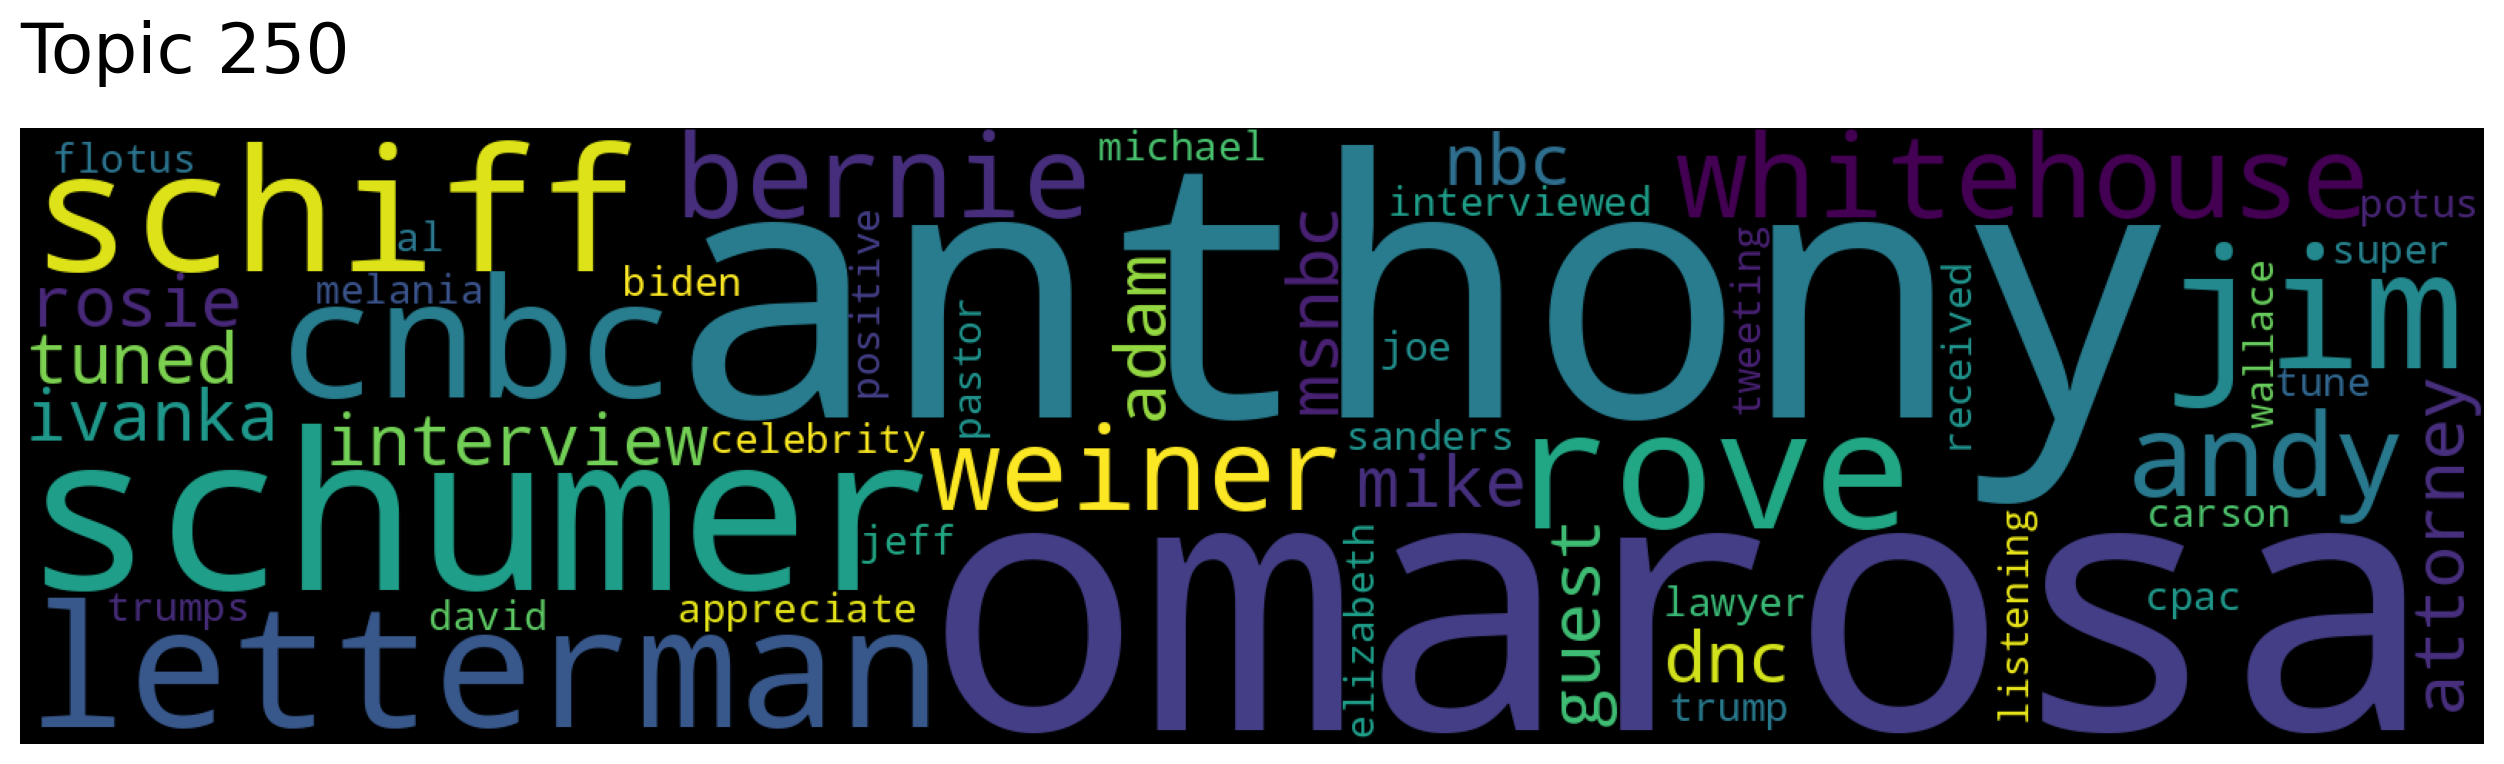

In [92]:
model3.generate_topic_wordcloud(250)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


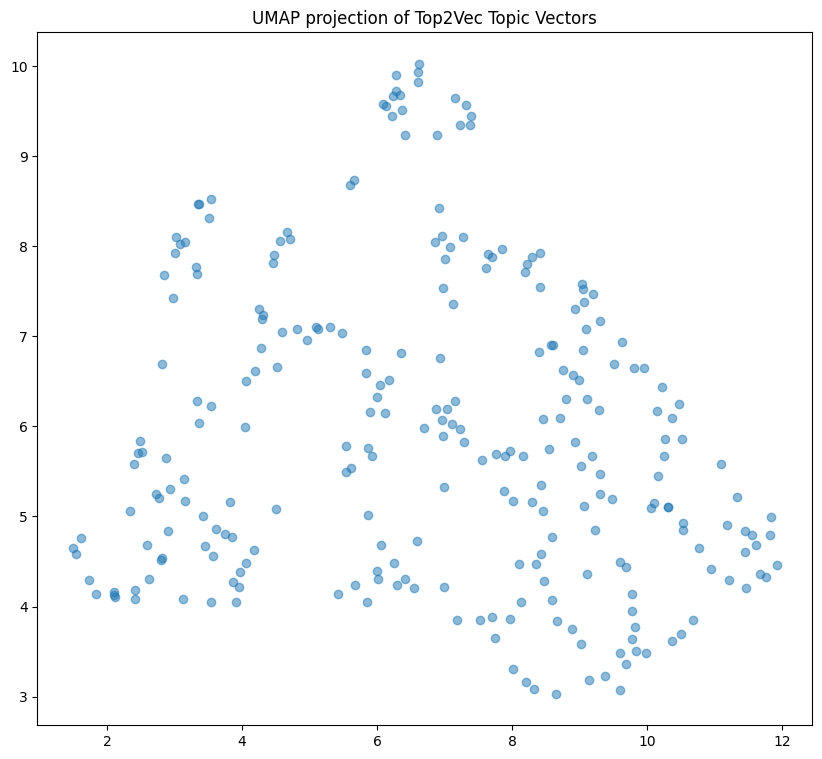

In [97]:
topic_vectors = model3.topic_vectors

# Dimensionalization
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.2, n_components=2, random_state=28)
umap_embeddings = umap_model.fit_transform(topic_vectors)


# Plotting the UMAP
plt.figure(figsize=(10, 9))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], alpha=0.5)
plt.title('UMAP projection of Top2Vec Topic Vectors')
plt.show()

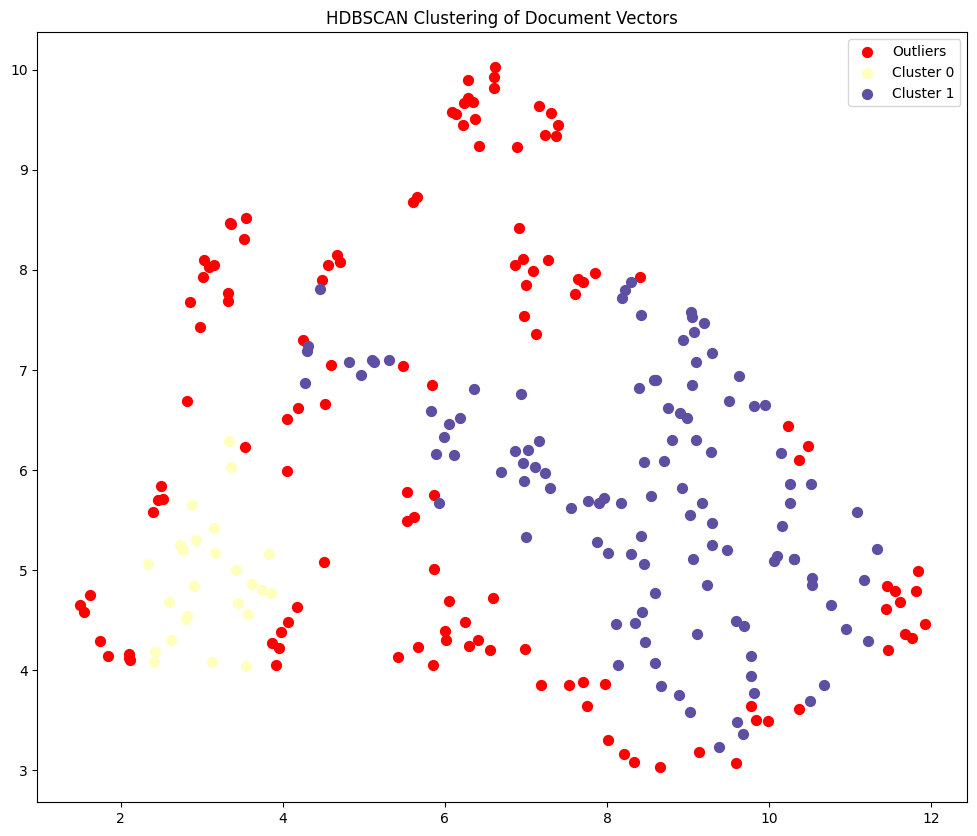

In [98]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=28)
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(umap_embeddings)

# Plotting
plt.figure(figsize=(12, 10))
unique_clusters = np.unique(cluster_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_clusters)))

for cluster, color in zip(unique_clusters, colors):
    if cluster == -1:  # Outliers marked as -1
        color = 'red'

    member_mask = cluster_labels == cluster
    plt.scatter(umap_embeddings[member_mask, 0], umap_embeddings[member_mask, 1],
                s=50, color=color, label=f'Cluster {cluster}' if cluster != -1 else 'Outliers')

plt.title('HDBSCAN Clustering of Document Vectors')
plt.legend()
plt.show()